In [1]:
# Importing all the libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv("D:\\mpatel4\\ML\\Train.csv")

<Figure size 432x288 with 0 Axes>

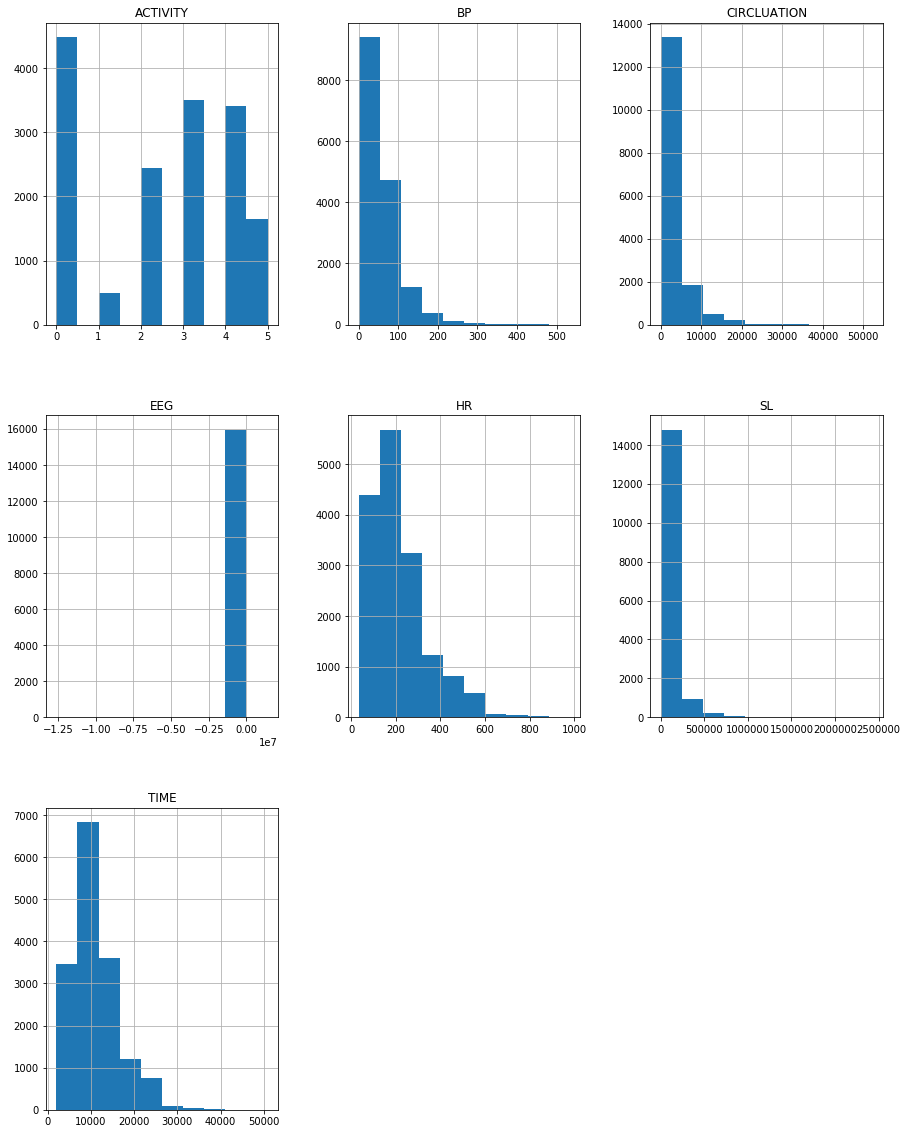

<Figure size 432x288 with 0 Axes>

In [3]:
data.hist(figsize=(15,20))
plt.figure()

In [4]:
data.shape

(16000, 7)

In [5]:
data.describe()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16000.000000,16000.000000,1.600000e+04,1.600000e+04,16000.000000,16000.000000,16000.000000
mean,2.363938,10928.568319,7.501312e+04,-5.649045e+03,58.246500,211.360813,2886.907813
std,1.739124,5256.510299,1.265950e+05,1.095037e+05,48.217701,129.714908,3802.279749
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7261.787500,9.894760e+03,-5.628910e+03,25.000000,119.000000,587.000000
50%,3.000000,9768.170000,3.098530e+04,-3.360000e+03,44.000000,180.000000,1581.000000
75%,4.000000,13465.375000,8.065725e+04,-2.147760e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,981.000000,52210.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
ACTIVITY       16000 non-null int64
TIME           16000 non-null float64
SL             16000 non-null float64
EEG            16000 non-null float64
BP             16000 non-null int64
HR             16000 non-null int64
CIRCLUATION    16000 non-null int64
dtypes: float64(3), int64(4)
memory usage: 875.1 KB


In [8]:
data.skew()

ACTIVITY       -0.172378
TIME            1.198928
SL              4.683776
EEG           -99.651099
BP              2.361523
HR              1.318390
CIRCLUATION     3.072173
dtype: float64

In [9]:
data.kurtosis()

ACTIVITY          -1.312661
TIME               2.129014
SL                39.042367
EEG            11139.563797
BP                 9.562039
HR                 2.178551
CIRCLUATION       14.216741
dtype: float64

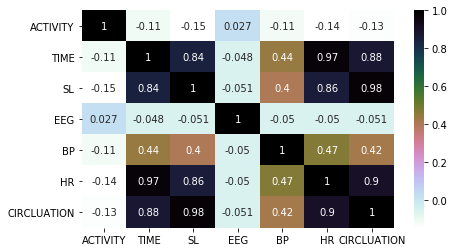

In [10]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') 
plt.show();

In [11]:
#Get the Z-Score of the features

z1=stats.zscore(data['TIME'])
z2=stats.zscore(data['SL'])
z3=stats.zscore(data['EEG'])
z4=stats.zscore(data['BP'])
z5=stats.zscore(data['HR'])
z6=stats.zscore(data['CIRCLUATION'])


data.insert(0,"Z-Score_TIME", list(z1), True)
data.insert(0,"Z-Score_SL", list(z2), True) 
data.insert(0,"Z-Score_EEG", list(z3), True) 
data.insert(0,"Z-Score_BP", list(z4), True) 
data.insert(0,"Z-Score_HR", list(z5), True) 
data.insert(0,"Z-Score_CIRCLUATION", list(z6), True) 

# Imputation of NaN Value where Z Score is more than 3

data.loc[data['Z-Score_TIME']>3,'TIME']=np.nan
data.loc[data['Z-Score_TIME']<-3,'TIME']=np.nan

data.loc[data['Z-Score_SL']>3,'SL']=np.nan
data.loc[data['Z-Score_SL']<-3,'SL']=np.nan

data.loc[data['Z-Score_EEG']>3,'EEG']=np.nan
data.loc[data['Z-Score_EEG']<-3,'EEG']=np.nan

data.loc[data['Z-Score_BP']>3,'BP']=np.nan
data.loc[data['Z-Score_BP']<-3,'BP']=np.nan

data.loc[data['Z-Score_HR']>3,'HR']=np.nan
data.loc[data['Z-Score_HR']<-3,'HR']=np.nan

data.loc[data['Z-Score_CIRCLUATION']>3,'CIRCLUATION']=np.nan
data.loc[data['Z-Score_CIRCLUATION']<-3,'CIRCLUATION']=np.nan

# imputing the median values in place of the NaN values
data['TIME']=data['TIME'].fillna(data['TIME'].median())
data['SL']=data['SL'].fillna(data['SL'].median())
data['EEG']=data['EEG'].fillna(data['EEG'].median())
data['BP']=data['BP'].fillna(data['BP'].median())
data['HR']=data['HR'].fillna(data['HR'].median())
data['CIRCLUATION']=data['CIRCLUATION'].fillna(data['CIRCLUATION'].median())

# getting rid of the z-Score columns
data=data.drop(['Z-Score_TIME', 'Z-Score_SL','Z-Score_EEG','Z-Score_BP','Z-Score_HR','Z-Score_CIRCLUATION'], axis=1)

In [12]:
#Seperating Features and Label
data = data[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION','ACTIVITY' ]]
dict_ = {0:"Standing",1:"Walking",2:'Sitting',3:"Falling",4:"Cramps",5:"Running"}
data["ACTIVITY"] = data["ACTIVITY"].map(dict_)

In [13]:
# Standardisation
minmax = MinMaxScaler()
data[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']] = minmax.fit_transform(data[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']])
data.to_csv("D:\\mpatel4\\ML\\preprocessed_minmax.csv")

In [14]:
#z-score normalization
scaler = StandardScaler().fit(data[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']]) 
data[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']] = scaler.fit_transform(data[['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']])
data.to_csv("D:\\mpatel4\\ML\\preprocessed_zscore.csv")


In [15]:
data = pd.read_csv("D:\\mpatel4\\ML\\preprocessed_zscore.csv",engine='python')


features = ['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']                       
label = ['ACTIVITY']                                                                 
class_value = ["Standing","Walking","Sitting","Falling","Cramps","Running"]     
features_data = data[features]                                                         
label_data = data[label]                                                              


In [16]:
#split the data into training data and test data
 
train_features, test_features,train_label, test_label = train_test_split(features_data, label_data, test_size=0.33, random_state=33)

In [17]:
#feature selection part

#import an external estimator
clf = DecisionTreeClassifier(criterion="entropy")
#↓ n_features_to_select:4
selector = RFE(estimator=clf,n_features_to_select=4,step=1)
selector.fit(features_data,np.ravel(label_data))
selected_features = [features[i] for i in list(selector.get_support(indices=True))]
print(selected_features)  # show selected features

['SL', 'EEG', 'HR', 'CIRCLUATION']


In [18]:
#L1-based feature selection

lsvc = LinearSVC(C=0.005, penalty="l1", dual=False).fit(features_data, np.ravel(label_data))
selector = SelectFromModel(lsvc,prefit=True)
selected_features = [features[i] for i in list(selector.get_support(indices=True))]
print(selected_features)

['TIME', 'SL', 'EEG', 'BP', 'HR']


In [19]:
data = pd.read_csv("D:\\mpatel4\\ML\\preprocessed_zscore.csv",engine='python')


features = ['TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']                       #get features list
label = ['ACTIVITY']                                                                 #get lable name
class_value = ["Standing","Walking","Sitting","Falling","Cramps","Running"]     #get class values list
features_data = data[features]                                                         #get features' Dataframe
label_data = data[label]                                                              #get class data

#split the data into training data and test data
from sklearn.model_selection import train_test_split  
train_features, test_features,train_label, test_label = train_test_split(features_data, label_data, test_size=0.33, random_state=33)


parameters = {'n_estimators':np.arange(110,150,3)}
clf = GridSearchCV(estimator=ExtraTreesClassifier(),n_jobs=-1,cv=5,param_grid=parameters)      #get the best n_estimators is 125
clf.fit(features_data,np.ravel(label_data))
print(clf.best_params_)
print(clf.best_score_)
clf = ExtraTreesClassifier(n_estimators=125,n_jobs=-1)

# fit the data
clf.fit(train_features,np.ravel(train_label))
predict_label = clf.predict(test_features)

{'n_estimators': 143}
0.782625


In [20]:
def evaluate(predict_label,test_label,class_value):
       
    print("Accuracy-Test data:", accuracy_score(y_pred=predict_label, y_true=test_label))
       
    
    kappa = cohen_kappa_score(test_label, predict_label)
    print("Kappa:", kappa)
   
    
    confustion = confusion_matrix(y_pred=predict_label, y_true=test_label, labels=class_value)
    confustion_matrix_df = pd.DataFrame(confustion, columns=class_value, index=class_value)
    print(confustion_matrix_df)
    

    
    report_dict = classification_report(y_true=test_label, y_pred=predict_label)
    print(report_dict)
##################################################################################################
evaluate(predict_label,test_label,class_value)

Accuracy-Test data: 0.7727272727272727
Kappa: 0.7125089897658463
          Standing  Walking  Sitting  Falling  Cramps  Running
Standing      1453        1        6        7       7        8
Walking          1      109       29        1       1        1
Sitting          4       29      615      135      27        3
Falling          6        1      132      824     154       20
Cramps          11        3       50      217     754      104
Running         13        1       12       41     175      325
              precision    recall  f1-score   support

      Cramps       0.67      0.66      0.67      1139
     Falling       0.67      0.72      0.70      1137
     Running       0.70      0.57      0.63       567
     Sitting       0.73      0.76      0.74       813
    Standing       0.98      0.98      0.98      1482
     Walking       0.76      0.77      0.76       142

   micro avg       0.77      0.77      0.77      5280
   macro avg       0.75      0.74      0.75      5280
weight